# Getting Started with Exploratory Data Analysis

Now we get to start actual data science!


Our goal this week is to explore the actual data, the values, in a dataset to get a basic idea of what is in the data.  

Summarizing and Visualizing Data are **very** important

- People cannot interpret high dimensional or large samples quickly
- Important in EDA to help you make decisions about the rest of your analysis
- Important in how you report your results
- Summaries are similar calculations to performance metrics we will see later
- visualizations are often essential in debugging models


**THEREFORE**
- You have  [a lot of chances](https://rhodyprog4ds.github.io/BrownFall22/syllabus/achievements.html#assignments-and-skills) to earn summarize and visualize
- we will be picky when we assess if you earned them or not

In [1]:
import pandas as pd

## Staying Organized

- See the new {ref}`resource:file-structure` section.
- Be sure to accept assignments and close the feedback PR if you will not work on them

## Loading Data and Examining Structure

In [2]:
coffee_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv'
coffee_df = pd.read_csv(coffee_data_url,index_col=0)

So far, we've loaded data in a few different ways and then we've examined
DataFrames as a data structure, looking at what different attributes they have
and what some of the methods are, and how to get data into them.

In [3]:
coffee_df.head(2)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0


From here we can see a few sample values of most of the column and we can be sure that the data loaded correctly.


```{admonition} Try it Yourself
What other tools have we learned to examine a DataFrame and when might you use them?
```


We can also get more structural information with the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method.

More information on this can also be found in the [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) attribute. Including that the type is the [most general](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes:~:text=If%20a%20pandas%20object%20contains%20data%20with%20multiple%20dtypes%20in%20a%20single%20column%2C%20the%20dtype%20of%20the%20column%20will%20be%20chosen%20to%20accommodate%20all%20of%20the%20data%20types%20(object%20is%20the%20most%20general).) if there are multiple types in the column.

````{margin}
```{hint}
There is also a related [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes) method.
```
````

In [4]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                28 non-null     object 
 1   Owner                  28 non-null     object 
 2   Country.of.Origin      28 non-null     object 
 3   Farm.Name              25 non-null     object 
 4   Lot.Number             6 non-null      object 
 5   Mill                   20 non-null     object 
 6   ICO.Number             17 non-null     object 
 7   Company                28 non-null     object 
 8   Altitude               25 non-null     object 
 9   Region                 26 non-null     object 
 10  Producer               26 non-null     object 
 11  Number.of.Bags         28 non-null     int64  
 12  Bag.Weight             28 non-null     object 
 13  In.Country.Partner     28 non-null     object 
 14  Harvest.Year           28 non-null     int64  
 15  Grading.

## Summary Statistics

Now, we can actually start to analyze the data itself.

The [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method provides us with a set of summary statistics that broadly
describe the data overall.

In [5]:
coffee_df.describe()

,Number.of.Bags,Harvest.Year,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,Clean.Cup,Balance,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,25.00000,25.000000,25.000000
mean,168.000000,2013.964286,7.702500,7.630714,7.559643,7.657143,7.675714,7.506786,9.904286,9.928214,7.541786,7.761429,80.868929,0.065714,2.964286,0.0,1.892857,1367.60000,1387.600000,1377.600000
std,143.226317,1.346660,0.296156,0.303656,0.342469,0.261773,0.317063,0.725152,0.238753,0.211030,0.526076,0.330507,2.441233,0.058464,12.357280,0.0,2.601129,838.06205,831.884207,833.980216
min,1.000000,2012.000000,6.750000,6.670000,6.500000,6.830000,6.670000,5.080000,9.330000,9.330000,5.250000,6.920000,73.750000,0.000000,0.000000,0.0,0.000000,40.00000,40.000000,40.000000
25%,1.000000,2013.000000,7.580000,7.560000,7.397500,7.560000,7.580000,7.500000,10.000000,10.000000,7.500000,7.580000,80.170000,0.000000,0.000000,0.0,0.000000,795.00000,795.000000,795.000000
50%,170.000000,2014.000000,7.670000,7.710000,7.670000,7.710000,7.750000,7.670000,10.000000,10.000000,7.670000,7.830000,81.500000,0.100000,0.000000,0.0,1.000000,1095.00000,1200.000000,1100.000000
75%,320.000000,2015.000000,7.920000,7.830000,7.770000,7.830000,7.830000,7.830000,10.000000,10.000000,7.830000,7.920000,82.520000,0.120000,0.000000,0.0,2.000000,1488.00000,1488.000000,1488.000000
max,320.000000,2017.000000,8.330000,8.080000,7.920000,8.000000,8.420000,8.250000,10.000000,10.000000,8.000000,8.580000,83.750000,0.130000,63.000000,0.0,9.000000,3170.00000,3170.000000,3170.000000


From this, we can draw several conclusions.  FOr example straightforward ones like:
- the smallest number of bags rated is 1 and at least 25% of the coffees rates only had 1 bag
- the first ratings included were 2012 and last in 2017  (min & max)
- the mean Mouthfeel was 7.5
- Category One defects are not very common ( the 75th% is 0)

Or more nuanced ones that compare across variables like
- the raters scored coffee higher on Uniformity.Cup and Clean.Cup than other scores (mean score; only on the ones that seem to have a scale of up to 8/10)
- the coffee varied more in Mouthfeel and Balance that most other scores (the std; only on the ones that seem to have a scale of of up to 8/10)
- there are 3 ratings with no altitude (count of other variables is 28; alt is 25

And these all give us a sense of the values and the distribution or spread fo the data in each column.


We can use the descriptive statistics on individual columns as well.

In [6]:
coffee_df['Balance'].describe()

count    28.000000
mean      7.541786
std       0.526076
min       5.250000
25%       7.500000
50%       7.670000
75%       7.830000
max       8.000000
Name: Balance, dtype: float64

To dig in on what the quantiles really mean, we can compute one manually.

First, we sort the data, then for the 25%, we select the point in index 6 because
becaues there are 28 values.

In [7]:
balance_sorted = coffee_df['Balance'].sort_values().values

What value of `x` to pick out 25%

In [8]:
x = 6
balance_sorted[x]

7.5

````{margin}
```{admonition} further reading
On the [documentation page for describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) the "<i class="fas fa-info-circle"></i>
 See Also" shows the links to the documentation of most of the individual functions.  This is a good way to learn about other things, or find something when you are not quite sure what it would be named.  Go to a function thats similar to what you want and then look at the related functions.
```
````


We can also extract each of the statistics that the `describe` method calculates individually, by name.  The quantiles
are tricky, we cannot just `.25%()` to get the 25% percentile, we have to use the
`quantile` method and pass it a value between 0 and 1.

In [9]:
coffee_df['Flavor'].quantile(.8)

7.83

Calculate the mean of `Aftertaste`

In [10]:
coffee_df['Aftertaste'].mean()

7.559642857142856

## Describing Nonnumerical Variables

There are different columns in the describe than the the whole dataset:

In [11]:
coffee_df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method',
       'Fragrance...Aroma', 'Flavor', 'Aftertaste', 'Salt...Acid',
       'Bitter...Sweet', 'Mouthfeel', 'Uniform.Cup', 'Clean.Cup', 'Balance',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'Expiration',
       'Certification.Body', 'Certification.Address', 'Certification.Contact',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [12]:
coffee_df.describe().columns

Index(['Number.of.Bags', 'Harvest.Year', 'Fragrance...Aroma', 'Flavor',
       'Aftertaste', 'Salt...Acid', 'Bitter...Sweet', 'Mouthfeel',
       'Uniform.Cup', 'Clean.Cup', 'Balance', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

We can get the prevalence of each one with `value_counts`

In [13]:
coffee_df['Color'].value_counts()

Green           20
Blue-Green       3
Bluish-Green     2
None             1
Name: Color, dtype: int64

```{admonition} Try it Yourself
Note `value_counts` does not count the `NaN` values, but `count` counts all of the
not missing values and the shape of the DataFrame is the total number of rows.
How can you get the number of missing Colors?
```

Describe only operates on the numerical columns, but we might want to know about the others.  We can get the number of each value with `value_counts`

In [14]:
coffee_df['Country.of.Origin'].value_counts()

India            13
Uganda           10
United States     2
Ecuador           2
Vietnam           1
Name: Country.of.Origin, dtype: int64

We can get the name of the most common country out of this Series using `idmax`

In [15]:
coffee_df['Country.of.Origin'].value_counts().idxmax()

'India'

Or see only how many different values with the related:

In [16]:
coffee_df['Country.of.Origin'].nunique()

5

We can also use the mode function, which works on both numerical or nonnumerical

In [17]:
coffee_df['Country.of.Origin'].mode()

0    India
Name: Country.of.Origin, dtype: object

## Basic Plotting

Pandas give us basic plotting capability built right into DataFrames.

<AxesSubplot: >

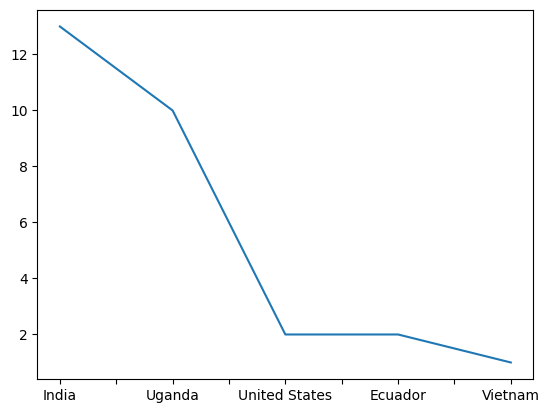

In [18]:
coffee_df['Country.of.Origin'].value_counts().plot()

It defaults to a line graph, which is not very informative in this case, so we can use the `kind` parameter to change it to a bar graph.

<AxesSubplot: >

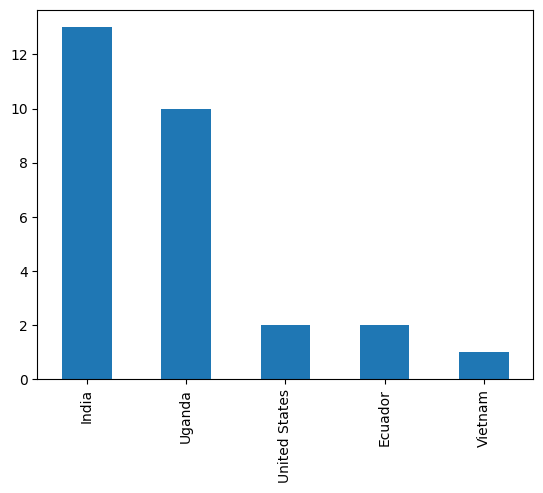

In [19]:
coffee_df['Country.of.Origin'].value_counts().plot(kind='bar')

## Matching Questions to Summary Statistics

When we brainstorm more questions that we can answer with summary statistics or that we might want to ask of this data, the ones that come to mind are often actually dependent on two variables. For example are two scores correlated? or what country has the highest rated coffe on `Flavor`?   

We'll come back to more detailed questions like this on Friday, but to start we can look at how numerical variables vary by categorical (nonnumerical) variables by grouping the data.


Above we saw which country had the most ratings (remember one row is one rating), but what if we wanted to see the mean number of bags per country?

In [20]:
coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].mean()

Country.of.Origin
Ecuador            1.000000
India            230.076923
Uganda           160.900000
United States     50.500000
Vietnam            1.000000
Name: Number.of.Bags, dtype: float64

```{important}
This data is only about coffee that was [rated by a particular agency](https://github.com/jldbc/coffee-quality-database/) it is not economic data, so we cannot, for example conclude which country *produces* the amount of data.  If we had economic dataset, a `Number.of.Bags` columns's mean would tell us exactly that, but the context of the dataset defines what a row means and therefore how we can interpret the **every single statistic** we calculate.
```




## Questions after class


### Can arrays be used in Jupyter Notebook?

Jupyter runs a fully powered python interpreter, so all python can work inside it.


#### why did coffee_df['Country.of.Origin'].max() say vietnam?

That applies a the `max` function to the `'Country.of.Origin'` column, without counting how many times the values occur.



#### Why, in the groupby function the first column is in between parenthesis nd the second one between brackets?

The inside parenthesis is the parameter of the groupby function, we could instead do it this way:

In [21]:
coffee_grouped = coffee_df.groupby('Country.of.Origin')

Then we can use `coffee_grouped` for different things

In [22]:
coffee_grouped.describe()

Number.of.Bags                                              \
                           count        mean         std  min     25%    50%   
Country.of.Origin                                                              
Ecuador                      2.0    1.000000    0.000000  1.0    1.00    1.0   
India                       13.0  230.076923  110.280296  1.0  140.00  300.0   
Uganda                      10.0  160.900000  163.690392  1.0    2.25  160.0   
United States                2.0   50.500000   70.003571  1.0   25.75   50.5   
Vietnam                      1.0    1.000000         NaN  1.0    1.00    1.0   

                                 Harvest.Year               ...  \
                      75%    max        count         mean  ...   
Country.of.Origin                                           ...   
Ecuador              1.00    1.0          2.0  2016.000000  ...   
India              320.00  320.0         13.0  2014.384615  ...   
Uganda             320.00  320.0         10.0  2013.300000  ...   
United States       75.25  100.0          2.0  2013.000000  ...   
Vietnam              1.00    1.0          1.0  2013.000000  ...   

                  altitude_high_meters         altitude_mean_meters  \
                                   75%     max                count   
Country.of.Origin                                                     
Ecuador                          40.00    40.0                  1.0   
India                          1500.00  3170.0                 12.0   
Uganda                         1488.00  1745.0                 10.0   
United States                  2448.75  3000.0                  2.0   
Vietnam                            NaN     NaN                  0.0   

                                                                               \
                          mean          std     min      25%     50%      75%   
Country.of.Origin                                                               
Ecuador              40.000000          NaN    40.0    40.00    40.0    40.00   
India              1421.666667  1021.022957   750.0   750.00  1000.0  1500.00   
Uganda             1354.500000   220.042546  1095.0  1203.00  1308.5  1488.00   
United States      1897.500000  1559.170453   795.0  1346.25  1897.5  2448.75   
Vietnam                    NaN          NaN     NaN      NaN     NaN      NaN   

                           
                      max  
Country.of.Origin          
Ecuador              40.0  
India              3170.0  
Uganda             1745.0  
United States      3000.0  
Vietnam               NaN  

[5 rows x 160 columns]

or as we did before

In [23]:
coffee_grouped['Number.of.Bags'].mean()

Country.of.Origin
Ecuador            1.000000
India            230.076923
Uganda           160.900000
United States     50.500000
Vietnam            1.000000
Name: Number.of.Bags, dtype: float64

The second one is to index  ([see last week's notes for more on indexing](2022-09-16)) the DataFrame and pick out one column.  It makes the DataFrame have fewer columns before applying mean to the whole object.  

We could make a smaller DataFrame first, then group, then mean

In [24]:
coffee_country_bags_df= coffee_df[['Number.of.Bags','Country.of.Origin']]
coffee_country_bags_df.head()

,Number.of.Bags,Country.of.Origin
1,300,Uganda
2,320,India
3,300,India
4,320,Uganda
5,1,Uganda


There are two sets of square brackets because putting a comma it would try to index along rows with one and columns with the other, to select multiple in one dimension you need to pass a list.

In [25]:
type(['Number.of.Bags','Country.of.Origin'])

list

If you do not put square `[]` or curly `{}` brackets around items, Python implicitly treats them as if there are parenthesis`()`

In [26]:
type(('Number.of.Bags','Country.of.Origin'))

tuple

and tuples are treated separately .

In [27]:
coffee_country_bags_df.groupby('Country.of.Origin').mean()

,Number.of.Bags
Country.of.Origin,
Ecuador,1.000000
India,230.076923
Uganda,160.900000
United States,50.500000
Vietnam,1.000000


#### A quick recap of how .info() counts non-null and dtype for each column would be great. Thanks!

above

#### Can you plot a graph that uses two columns in a dataset?
Yes, we will see that on Wednesday.

#### Are there any other data types as important as dataframes in pandas?

DataFrames are the main type provided by pandas, there are also Series which is conceptually a single column, groupby objects which is basically a list of (DataFrame,label) tuples, and some indexing, but all of these exist to support creating and operating on DataFrames.

#### Will we be utilizing any other packages /libraries mentioned than the ones for visualizing data that we talked about today?

We will use pandas for basic plots and seaborn for more advanced plots.  There are other libraries for visualization like plotly for interactive plots, but those are more advanced than we need or for specialized use cases. However, the way these type of libraries are designed, is that the special use case ones are for when the basic ones do not do what you need and they often have common patterns.

#### When displaying two categories like we did at the end could you measure a different thing for each category? Like count for one and mean for the other?

Yes! We will likely not do this in class, but it is a small extension from what we have covered and uses the [pandas aggregrate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html) method.

```{hint}
This is expected for visualize level 3
```


#### How in depth will we go with graphing data and looking at it systemically to find patterns?

At some level, that is what we sill do for the rest of the semester.  We will not cover everything there is to know about graphing, there are whole courses on data visualization. Most of the pattern-finding we will do is machine learning.  


### Assignment

#### For assignment 2, how do I find appropriate datasets online?

I collated the ones that I recommend on the [datasets](datasets) page.  Then find something that is of interest to you.  

#### How do you import a .py file from GitHub? Is there a way to do that without downloading it locally?

It does need to be local in order to import it as a module.  

Ideally, you will work with all of your assignment repos locally either following the instructions in [the notes from last class](ghoffline)